## Ejemplo 4-5

Resolver el sistema

$$
\begin{cases}
1.78x_1 + 3.01x_2 - 4.88x_3 = -7.70 \\
4.63x_1 - 1.06x_2 - 2.27x_3 = -6.36 \\
-3.39x_1 + 9.81x_2 - 4.78x_3 = 3.95
\end{cases}
\quad (4.14)
$$

con el método de eliminación completa de Gauss-Jordan. Se tiene

$$\left[\begin{array}{ccc|c} \boxed{1.78} & 3.01 & -4.88 & -7.70 \\ 4.63 & -1.06 & -2.27 & -6.36 \\ -3.39 & 9.81 & -4.78 & 3.95 \end{array}\right]$$

$$1R(1/1.78) = 1R'$$

$$2R + 1R'(-4.63)$$

$$3R + 1R'(3.39)$$

$$\left[\begin{array}{ccc|c} 1 & 1.69 & -2.74 & -4.32 \\ 0 & \boxed{-8.88} & 10.4 & 13.6 \\ 0 & 15.5 & -14.1 & -10.7 \end{array}\right]$$

$$2R(-1/8.88) = 2R'$$

$$1R + 2R'(-1.69)$$

$$3R + 2R'(-15.5)$$

$$\left[\begin{array}{ccc|c} 1 & 0 & -0.76 & -1.74 \\ 0 & 1 & -1.17 & -1.53 \\ 0 & 0 & \boxed{4.00} & 13.00 \end{array}\right]$$

$$3R(1/4.00) = 3R'$$

$$1R + 3R'(0.76)$$

$$2R + 3R'(1.17)$$

$$\left[\begin{array}{ccc|c} 1 & 0 & 0 & 0.73 \\ 0 & 1 & 0 & 2.27 \\ 0 & 0 & 1 & 3.25 \end{array}\right]$$

Y la solución del sistema es

$$x_1 = 0.73$$

$$x_2 = 2.27$$

$$x_3 = 3.25$$


La sustitución de la solución anterior en el sistema inicial de ecuaciones, produce los resultados

$$1.78(0.73) + 3.01(2.27) - 4.88(3.25) = -7.73 \neq -7.70$$

$$4.63(0.73) - 1.06(2.27) - 2.27(3.25) = -6.40 \neq -6.36$$

$$-3.39(0.73) + 9.81(2.27) - 4.78(3.25) = 4.26 \neq 3.95$$

Como se ve de este ejemplo, la solución obtenida en un sistema tan pequeño como el resuelto, produce un error del $7\%$ en la última ecuación. Esta es una situación real al resolver sistemas lineales en computadoras digitales, ya que éstas tienen siempre un límite con respecto al número de dígitos considerado para representar los valores numéricos de los elementos con los que se trabaja.

Para hacer resaltar esta situación, supóngase que el pivote del primer renglón de la matriz no fuera $1.78$ sino $0.01$. Eliminando los elementos de la columna del pivote, se tiene:

$$\left[\begin{array}{ccc|c} 1 & 301 & -488 & -770 \\ 0 & -1390 & 2260 & 3560 \\ 0 & 1030 & -1650 & -2610 \end{array}\right]$$

y se ha llegado al caso límite de que, al usar este pivote, los coeficientes de $x_2$ y $x_3$ y el término independiente de las dos últimas ecuaciones no son significativos, en tal forma que pueden valer lo que ahora valen o ser nulos y obtener la misma matriz. Por lo tanto, al aplicar el método de Gauss-Jordan, no convendrá de ninguna manera tomar pivotes cercanos a cero, sino todo lo contrario. Se ha demostrado que, si se selecciona como pivote al elemento de la matriz que tenga valor absoluto máximo, se minimiza el error por redondeo.



## 4-5 Programación del método de Gauss-Jordan

Antes de presentar el diagrama correspondiente a este método, conviene indicar las características principales que debe tener un programa basado en el método de Gauss-Jordan:

1). Búsqueda del elemento máximo; en esta operación se localiza el mayor elemento en valor absoluto para después emplearlo como pivote. Las razones que justifican esta operación son:

$a)$ Reducir al mínimo el error de redondeo, y

$b)$ Evitar que pueda intentarse una división entre cero en el caso que la matriz sea no singular, permitiendo también, de esta manera, detectar los casos en que la matriz sea singular.

2). Normalización; es decir, hacer que el elemento que va a actuar como pivote sea igual a uno. Esta operación tiene como finalidad evitar que los elementos de la matriz lleguen a ser muy grandes y sobrepasen la capacidad de almacenamiento de una palabra de computadora.

3). Determinar que no hay solución única; cuando el elemento mayor que va a actuar como pivote es menor o igual que una pequeña cantidad, se puede decir que la matriz no tiene inversa, o bien que el sistema de ecuaciones que se está analizando no tiene solución única.

4). Inversión en el sitio; esta operación está dirigida exclusivamente al ahorro de localidades de memoria de la computadora y su función puede ser importante cuando la matriz que se quiere invertir es de orden muy grande. Resumiendo, se puede decir que si se asigna una parte de la memoria a la matriz $\mathbf{A}$, esta misma parte va a ser ocupada por $\mathbf{A}^{-1}$.

5). Solución del sistema; esta característica del programa implica que además de la matriz de coeficientes $\mathbf{A}$, se tiene un vector independiente $\mathbf{b}$ sobre el cual se van a efectuar las mismas transformaciones que en la matriz $\mathbf{A}$. En general, en este mismo vector quedará la solución $\mathbf{x}$ del sistema de ecuaciones.

6). Cálculo del determinante; esta propiedad del programa se obtiene cuando se efectúa la normalización; es decir, cuando se dividen todos los elementos de un renglón entre el pivote. El producto de todos los elementos que actúan como pivote y con los que se hace la normalización, proporciona el determinante de la matriz que se está analizando. Al efectuar estos cálculos, hay que tomar en cuenta los cambios de renglones debidos a la búsqueda del mayor elemento ya que afectan el signo del determinante.

$\mathbf{A}$. La inversa se puede obtener empleando alguna matriz extra del mismo orden o bien en el mismo sitio de la matriz original, como se indicó en el inciso 4.

En base a las ideas anteriores se han elaborado dos programas que emplean el método de Gauss-Jordan. El primer programa tiene las características definidas con los incisos 2 y 5 y está dirigido a mostrar el funcionamiento normal del método sin las complicaciones derivadas de la existencia de un elemento nulo en la diagonal principal, las que obligan a buscar el mayor elemento, o bien del ahorro de localidades de memoria invirtiendo en el sitio.

El programa no es limitativo mientras se trate de resolver sistemas de ecuaciones que provienen de una gran cantidad de problemas físicos, ya que, en general en estos casos la matriz de coeficientes tiene la diagonal principal pesada con respecto al resto de los elementos; es decir, el valor numérico del elemento sobre la diagonal es superior a cualquier valor de los otros elementos del renglón respectivo.

Este primer programa opera sobre una matriz aumentada $\mathbf{A}$ de orden $N$ por $M$, en donde $M=N+1$. Dentro de este arreglo se tiene la matriz de coeficientes del sistema y su última columna es la correspondiente a los términos independientes. Como se ha admitido que los elementos de la diagonal principal de la matriz de coeficientes es pesada con respecto al resto de los elementos, se van a seleccionar los pivotes sobre esta diagonal en perfecto orden; es decir, el primer pivote seleccionado será el primer elemento diagonal, el segundo pivote será el segundo elemento de la diagonal y así sucesivamente. Procediendo en esta forma, después de $i-1$ pasos, la situación será como se muestra en la figura 4-1

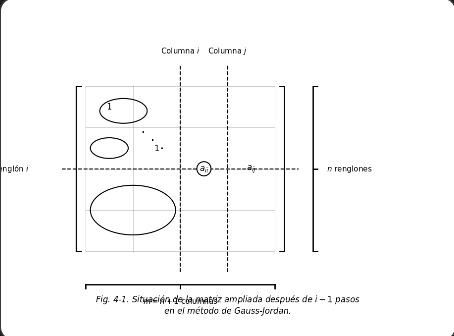

**Fig. 4-1.** Situación de la matriz ampliada después de $i-1$ pasos en el método de Gauss-Jordan.


En este momento habrá que seleccionar a $a_{ii}$ como pivote y dividir todos los elementos del $i$-ésimo renglón entre este pivote. En lenguaje de programación, esto se expresa con:

$$pivote = a_{ii} \quad (4.25)$$

$$a_{ij} = \frac{a_{ij}}{pivote}, \quad j = i, i+1, \ldots, m$$


La parte del diagrama general de flujo correspondiente a las ecuaciones $(4.25)$, se muestra en la figura 4-2.


**Fig. 4-2. Normalización en el método de Gauss-Jordan.**

**Diagrama de flujo - Proceso de Normalización:**

1. **Inicio**: Calcular el pivote
   $$\text{PIVOTE} = A(I,I)$$

2. **Bucle**: Para $J = I, I+1, \ldots, M$
   
   - Verificar condición: ¿$J &gt; M$?
   
   - Si **No** ($J \leq M$):
     $$A(I,J) = \frac{A(I,J)}{\text{PIVOTE}}$$
     
     Volver al paso 2 (siguiente $J$)
   
   - Si **Sí** ($J &gt; M$): 
     Terminar normalización del renglón $I$

**Algoritmo en pseudocódigo:**


In [1]:
import numpy as np

def gauss_jordan(n, a):
    """
    Subrutina para aplicar el método de Gauss-Jordan
    Los elementos pivotes se seleccionan sobre la diagonal principal
    """
    m = n + 1  # m = n+1 columnas (matriz aumentada)
    
    for i in range(n):  # DO 4 I=1,N (Python usa índices 0-based)
        # Se selecciona pivote
        pivote = a[i, i]
        
        # Se dividen los elementos del renglón del pivote entre el propio pivote
        # (Normalización)
        for j in range(i, m):  # DO 1 J=I,M
            a[i, j] = a[i, j] / pivote
        
        # Se eliminan los elementos de la columna del pivote
        for k in range(n):  # DO 3 K=1,N
            if k == i:  # IF (K.EQ.I) GO TO 3
                continue
            cero = a[k, i]
            # Eliminación: fila_k = fila_k - cero * fila_pivote
            for j in range(i, m):  # DO 2 J=I,M
                a[k, j] = a[k, j] - cero * a[i, j]
            # 3 CONTINUE
    
    return a

# PROGRAMA PRINCIPAL
def main():
    print("PROGRAMA PARA RESOLVER SISTEMAS DE ECUACIONES LINEALES")
    print("CON LOS ELEMENTOS DIAGONALES PESADOS CON RESPECTO AL RESTO")
    print("=" * 60)
    
    while True:  # GO TO 1 (bucle infinito hasta break)
        try:
            n = int(input("\nIngrese el número de ecuaciones N (2-20): "))
            if n < 2 or n > 20:
                print("Error: N debe estar entre 2 y 20")
                continue
            
            m = n + 1
            # DIMENSION A(20,21)
            a = np.zeros((20, 21))
            
            print(f"\nIngrese los elementos de la matriz ampliada ({n}x{m}):")
            print("(Coeficientes + término independiente por cada ecuación)")
            
            # Leer matriz
            for i in range(n):
                print(f"\nEcuación {i+1}:")
                for j in range(m):
                    a[i, j] = float(input(f"  A({i+1},{j+1}): "))
            
            # Mostrar matriz ampliada
            print("\nMATRIZ AMPLIADA DEL SISTEMA:")
            for i in range(n):
                row_data = [f"{a[i,j]:12.4f}" for j in range(m)]
                print(f"Renglón {i+1:3d}:" + "".join(row_data))
            
            # Llamar a Gauss-Jordan
            a = gauss_jordan(n, a)
            
            # Mostrar solución
            print("\n" + "=" * 60)
            print("SOLUCIÓN DEL SISTEMA:")
            print("=" * 60)
            for i in range(n):
                print(f"X({i+1:2d}) = {a[i, m-1]:13.4f}")
            
            print("\nMatriz final (forma escalonada reducida):")
            for i in range(n):
                row_data = [f"{a[i,j]:12.4f}" for j in range(m)]
                print("".join(row_data))
                
        except ValueError:
            print("Error: Ingrese valores numéricos válidos")
        except Exception as e:
            print(f"Error: {e}")
        
        continuar = input("\n¿Resolver otro sistema? (s/n): ").lower()
        if continuar != 's':
            break

if __name__ == "__main__":
    main()

PROGRAMA PARA RESOLVER SISTEMAS DE ECUACIONES LINEALES
CON LOS ELEMENTOS DIAGONALES PESADOS CON RESPECTO AL RESTO



Ingrese el número de ecuaciones N (2-20):  20



Ingrese los elementos de la matriz ampliada (20x21):
(Coeficientes + término independiente por cada ecuación)

Ecuación 1:
Error: float() argument must be a string or a real number, not 'NoneType'


<class 'AttributeError'>: 'NoneType' object has no attribute 'lower'